In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from datetime import datetime

In [179]:
model_path_LSTM = "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240925/CAMD/CAMD_fh1_u_total_ml_output_v2.parquet"

In [180]:
station = "CAMD"
fh = 18

In [181]:
full_df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240925/CAMD/09_25_2024_17:02:47_full_CAMD.parquet"
)

In [182]:
lookup_path = "/home/aevans/nwp_bias/src/machine_learning/data/parent_models/HRRR/s2s/Champlain Valley_u_total_lookup.csv"

In [183]:
ldf = pd.read_parquet(model_path_LSTM)
# ldf = ldf.sort_index()

In [184]:
full_df.dropna(inplace=True)
full_df

,valid_time_cos,valid_time_sin,target_error,valid_time,t2m_CAMD,sh2_CAMD,d2m_CAMD,r2_CAMD,u10_CAMD,v10_CAMD,...,relh_REDF,srad_REDF,pres_REDF,mslp_REDF,wspd_sonic_mean_REDF,wspd_sonic_REDF,wmax_sonic_REDF,wdir_sonic_REDF,snow_depth_REDF,precip_total_REDF
0,0.982223,0.187719,1.730658,2018-01-11 03:00:00,2.189966,0.00355,-0.951453,77.300003,-3.548233,1.004442,...,95.392609,0.001170,974.975586,977.115479,3.519346,4.445380,8.120528,158.920700,0.825383,0.24
1,0.978856,0.204552,4.444740,2018-01-12 03:00:00,6.341943,0.00561,5.325922,84.599998,-4.672436,1.330883,...,95.918800,0.000292,970.924011,971.650757,3.851957,4.699534,9.312122,154.573303,0.684439,0.52
2,0.978856,0.204552,4.169940,2018-01-12 04:00:00,6.101404,0.00554,5.160333,84.099998,-4.379520,1.444168,...,98.989410,0.001382,970.390808,971.196716,3.457803,3.176083,6.521485,144.619400,0.661138,3.52
3,0.978856,0.204552,3.186375,2018-01-12 05:00:00,6.657617,0.00568,5.509271,82.800003,-4.738548,0.647657,...,99.470642,0.002114,968.942383,969.676147,3.456227,2.514996,5.225683,143.335602,0.643123,5.32
4,0.978856,0.204552,3.648055,2018-01-12 06:00:00,6.533197,0.00589,6.010767,87.300003,-4.898716,0.548046,...,99.801048,0.000848,968.309204,968.964600,3.737552,3.669555,6.197971,148.569702,0.622862,10.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45956,0.999853,-0.017166,1.898367,2023-12-31 19:00:00,0.324304,0.00314,-2.692480,80.900002,3.291378,-0.562228,...,84.214592,51.851749,967.919922,970.515320,2.043024,2.574425,3.827082,275.813995,0.000567,0.00
45957,0.999853,-0.017166,1.865220,2023-12-31 20:00:00,-0.293982,0.00311,-2.837714,83.099998,3.361370,-0.756521,...,84.852638,33.736954,968.149475,970.752075,1.957658,1.833155,3.008910,314.117004,0.001656,0.00
45958,0.999853,-0.017166,1.935442,2023-12-31 21:00:00,-0.563208,0.00305,-3.087714,83.300003,2.676653,-1.193110,...,85.170937,4.950904,968.346680,971.014465,1.388728,1.138818,1.555824,273.240997,0.000922,0.00
45959,0.999853,-0.017166,1.078940,2023-12-31 22:00:00,-0.438635,0.00313,-2.712714,84.599998,1.909951,-1.236346,...,86.208473,0.059643,968.602417,971.307434,1.084786,0.937219,1.875248,337.975098,0.002608,0.00


In [185]:
for k in full_df.keys():
    print(k)

valid_time_cos
valid_time_sin
target_error
valid_time
t2m_CAMD
sh2_CAMD
d2m_CAMD
r2_CAMD
u10_CAMD
v10_CAMD
tp_CAMD
mslma_CAMD
tcc_CAMD
asnow_CAMD
cape_CAMD
dswrf_CAMD
dlwrf_CAMD
gh_CAMD
u_total_CAMD
u_dir_CAMD
lulc_cat_CAMD
elev_cat_CAMD
slope_cat_CAMD
t2m_OSCE
sh2_OSCE
d2m_OSCE
r2_OSCE
u10_OSCE
v10_OSCE
tp_OSCE
mslma_OSCE
tcc_OSCE
asnow_OSCE
cape_OSCE
dswrf_OSCE
dlwrf_OSCE
gh_OSCE
u_total_OSCE
u_dir_OSCE
lulc_cat_OSCE
elev_cat_OSCE
slope_cat_OSCE
t2m_CSQR
sh2_CSQR
d2m_CSQR
r2_CSQR
u10_CSQR
v10_CSQR
tp_CSQR
mslma_CSQR
tcc_CSQR
asnow_CSQR
cape_CSQR
dswrf_CSQR
dlwrf_CSQR
gh_CSQR
u_total_CSQR
u_dir_CSQR
lulc_cat_CSQR
elev_cat_CSQR
slope_cat_CSQR
t2m_REDF
sh2_REDF
d2m_REDF
r2_REDF
u10_REDF
v10_REDF
tp_REDF
mslma_REDF
tcc_REDF
asnow_REDF
cape_REDF
dswrf_REDF
dlwrf_REDF
gh_REDF
u_total_REDF
u_dir_REDF
lulc_cat_REDF
elev_cat_REDF
slope_cat_REDF
lat_CAMD
lon_CAMD
elev_CAMD
tair_CAMD
ta9m_CAMD
td_CAMD
relh_CAMD
srad_CAMD
pres_CAMD
mslp_CAMD
wspd_sonic_mean_CAMD
wspd_sonic_CAMD
wmax_sonic_CAMD
w

In [186]:
ldf["valid_time"] = full_df["valid_time"]

In [187]:
def which_fold(df, fold):
    length = len(df)
    test_len = int(length * 0.2)
    df_train = pd.DataFrame()

    for n in np.arange(0, 5):
        if n != fold:
            df1 = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            df_train = pd.concat([df_train, df1])
        else:
            df_test = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            f = int(len(df_test) * 0.5)
            df_val = df_test.iloc[:f]
            df_test = df_test[-f:]

    return df_train["valid_time"], df_test["valid_time"], df_val["valid_time"]

In [188]:
ldf["valid_time"] = pd.to_datetime(ldf["valid_time"])

In [189]:
df_train, df_test, df_val = which_fold(ldf, 4)

In [190]:
test_set_start = df_test.iloc[0]
test_set_start

Timestamp('2023-06-11 02:00:00')

In [191]:
test_set_finish = df_test.iloc[-1]
test_set_finish

Timestamp('2023-12-25 19:00:00')

In [192]:
df_val.iloc[0]

Timestamp('2022-11-18 13:00:00')

In [193]:
df_val.iloc[-1]

Timestamp('2023-06-10 23:00:00')

In [194]:
def date_filter(ldf, time1, time2):
    ldf = ldf[ldf["valid_time"] > time1]
    ldf = ldf[ldf["valid_time"] < time2]

    return ldf

## Time filter 

In [195]:
time1 = datetime(2023, 10, 1, 0, 0, 0)
time2 = datetime(2023, 10, 30, 23, 0, 0)

ldf = date_filter(ldf, time1, time2)
full_df = date_filter(full_df, time1, time2)

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def create_heatmap(df, x_column="target_error_lead_0", y_column="Model forecast"):
    # Round values
    df[x_column] = np.round(df[x_column] / 1.0) * 1.0
    df[y_column] = np.round(df[y_column] / 1.0) * 1.0

    # Pivot the DataFrame to create a matrix suitable for the heatmap
    heatmap_data = pd.pivot_table(
        df, index=y_column, columns=x_column, aggfunc="size", fill_value=0
    )

    # Calculate percentages
    total = heatmap_data.sum()
    heatmap_data_percent = (heatmap_data / total) * 100

    # Create the heatmap using seaborn
    plt.figure(figsize=(16, 12))
    sns.heatmap(
        heatmap_data_percent,
        vmax=100,
        cmap="Reds",
        annot=True,
        fmt=".1f",  # Format as percentage with one decimal place
        cbar_kws={"label": "Percentage (%)"},  # Add color bar label
    )

    # Set the labels and title
    plt.xlabel("Target")
    plt.ylabel("LSTM")
    plt.title("Heatmap of Target vs LSTM")

    # Show the heatmap
    plt.show()

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


def create_scatterplot(df, x_column="target_error_lead_0", y_column="Model forecast"):
    # Calculate point density
    xy = np.vstack([df[x_column], df[y_column]])
    z = gaussian_kde(xy)(xy)

    plt.figure(figsize=(8, 8))

    # Create the scatterplot
    scatter = plt.scatter(
        df[x_column],
        df[y_column],
        c=z,
        cmap="YlOrRd",
        s=100,
        edgecolor="black",
        alpha=0.3,
    )

    # Add color bar with label
    cbar = plt.colorbar(scatter)
    cbar.set_label("Point Density")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.ylabel("LSTM", fontsize=18)
    plt.title("Scatterplot with Density and Colorbar", fontsize=24)

    # Show the plot
    plt.show()

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def create_scatterplot_heatmap(
    df, x_column="target_error_lead_0", y_column="Model forecast", gridsize=100
):
    plt.figure(figsize=(16, 12))

    # Create a 2D histogram (binning) to calculate point concentration
    hb = plt.hexbin(
        df[x_column], df[y_column], gridsize=gridsize, cmap="viridis", mincnt=1
    )

    # Add color bar with label
    cbar = plt.colorbar(hb)
    cbar.set_label("Number of Points")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.ylabel("LSTM", fontsize=18)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.title("Scatterplot Heatmap with Point Frequency", fontsize=24)

    # Show the plot
    plt.show()

In [199]:
import matplotlib.pyplot as plt
import numpy as np


def create_hexbin_heatmap(
    df, x_column="target_error_lead_0", y_column="Model forecast"
):
    plt.figure(figsize=(16, 12))

    # Create hexbin plot with continuous color density
    hexplot = plt.hexbin(
        df[x_column], df[y_column], gridsize=50, cmap="cividis", mincnt=1
    )

    # Add color bar with label
    cbar = plt.colorbar(hexplot)
    cbar.set_label("Count in Bin")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.ylabel("LSTM", fontsize=18)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.title("Hexbin Scatterplot Heatmap with Colorbar", fontsize=24)

    # Show the plot
    plt.show()

In [200]:
def quantile_regression(x, y):
    X = x[:, np.newaxis]
    quantiles = [0.10, 0.5, 0.90]
    predictions = {}
    out_bounds_predictions = np.zeros_like(y, dtype=np.bool_)
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

    predictions_df = pd.DataFrame()
    predictions_df["target"] = x

    for q in quantiles:
        predictions_df[q] = predictions.get(q)

    return qr, y_pred, predictions_df

In [201]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


def ml_output(df, full_df, fold, station, test_set_start, test_set_finish, fh):
    fig, ax = plt.subplots(figsize=(24, 6))
    x = df["valid_time"]

    # Convert datetime values to numerical values
    x_numeric = mdates.date2num(x)

    # Assuming your timestamps are in a datetime64 format
    day_mask = (x.dt.hour >= 6) & (
        x.dt.hour < 18
    )  # Adjust the hours based on your day/night definition

    plt.plot(
        np.array(x),
        np.array(df["target_error_lead_0"]),
        c="black",
        linewidth=1,
        label="Target",
    )

    plt.plot(
        np.array(x),
        np.array(df["Model forecast"]),
        c="red",
        linewidth=3,
        alpha=0.7,
        label="LSTM Output",
    )

    # plt.axvline(
    #     x=test_set_start,
    #     c="green",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Start",
    # )
    # plt.axvline(
    #     x=test_set_finish,
    #     c="red",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Finish",
    # )

    # Fill daytime hours with white color
    ax.fill_between(
        x_numeric, -4, 4.1, where=day_mask, color="white", alpha=0.5, label="Daytime"
    )

    # Fill nighttime hours with grey color
    ax.fill_between(
        x_numeric, -4, 4.1, where=~day_mask, color="grey", alpha=0.2, label="Nighttime"
    )

    ax.set_title(f"Wind Error LSTM Output v Target: {station}: FH{fh}", fontsize=28)
    # plt.ylim(-5, 5.)
    ax.legend()

    plt.show()

In [202]:
def find_linear_coefficients(df):
    """
    Adjusts the 'Model forecast' column of the input DataFrame by aligning it with
    the statistics of the 'target_error_lead_0' column. The alignment involves
    subtracting the difference in means and scaling based on the maximum absolute values
    of both columns. The result is that the 'Model forecast' is transformed to better fit
    the target error profile.

    Parameters:
    df (pandas.DataFrame): Input DataFrame with 'target_error_lead_0' and 'Model forecast' columns.

    Returns:
    pandas.DataFrame: The modified DataFrame with updated 'Model forecast' values.
    """

    # Calculate the mean of 'target_error_lead_0' and 'Model forecast'
    mean1 = st.mean(df["target_error_lead_0"])
    mean2 = st.mean(df["Model forecast"])

    # Find the row with the maximum absolute value in 'target_error_lead_0'
    max1_index = df["target_error_lead_0"].abs().idxmax()
    # Retrieve the row that contains this maximum absolute value
    max_row = df.loc[max1_index]

    # Find the row with the maximum absolute value in 'target_error_lead_0'
    min1_index = df["target_error_lead_0"].abs().idxmin()
    # Retrieve the row that contains this maximum absolute value
    min_row = df.loc[min1_index]

    # Find the maximum absolute value of 'target_error_lead_0' and 'Model forecast'
    max1 = abs(max_row["target_error_lead_0"])
    max2 = abs(max_row["Model forecast"])

    # Find the maximum absolute value of 'target_error_lead_0' and 'Model forecast'
    min1 = abs(min_row["target_error_lead_0"])
    min2 = abs(min_row["Model forecast"])

    # Calculate the difference in means between 'Model forecast' and 'target_error_lead_0'
    diff = mean2 - mean1

    # # Recalculate the maximum absolute value after adjustment
    # max1 = abs(max(df['target_error_lead_0']))
    # max2 = abs(max(df['Model forecast']))

    # Scale the 'Model forecast' by the ratio of maximum absolute values
    multiply1 = max1 / max2

    multiply2 = min1 / min2

    multiply = (multiply1 + multiply2) / 2.0

    # Return the modified DataFrame
    return diff, multiply

In [203]:
def refit_output(df, diff, multiply):
    # Adjust the 'Model forecast' by subtracting the difference in means
    df["Model forecast"] = df["Model forecast"] - diff
    df["Model forecast"] = df["Model forecast"] * multiply

    # Calculate the median of 'target_error_lead_0' and 'Model forecast'
    mean3 = st.median(df["target_error_lead_0"])
    mean4 = st.median(df["Model forecast"])

    # Center both 'target_error_lead_0' and 'Model forecast' by subtracting their medians
    df["target_error_lead_0"] = df["target_error_lead_0"] - mean3
    df["Model forecast"] = df["Model forecast"] - mean4

    return df

In [204]:
def get_alpha_diff_from_lookup(ldf, lookup_path, station, fh):
    lookup = pd.read_csv(lookup_path)
    lookup = lookup[lookup["station"] == station]
    lookup = lookup[lookup["fh"] == fh]

    alpha = lookup["alpha"].values
    diff = lookup["diff"].values

    return alpha, diff

In [205]:
ldf = refit_output(ldf, 0, 1)

In [206]:
ldf["diff"] = ldf.iloc[:, 0] - ldf.iloc[:, 1]

In [207]:
mean = st.mean(abs(ldf["diff"]))
mean

0.6884718870199965

In [208]:
mean_s = st.mean(ldf["diff"] ** 2)
mean_s

0.8741545140877902

In [209]:
# ldf['Model forecast'] = ldf['Model forecast']*2

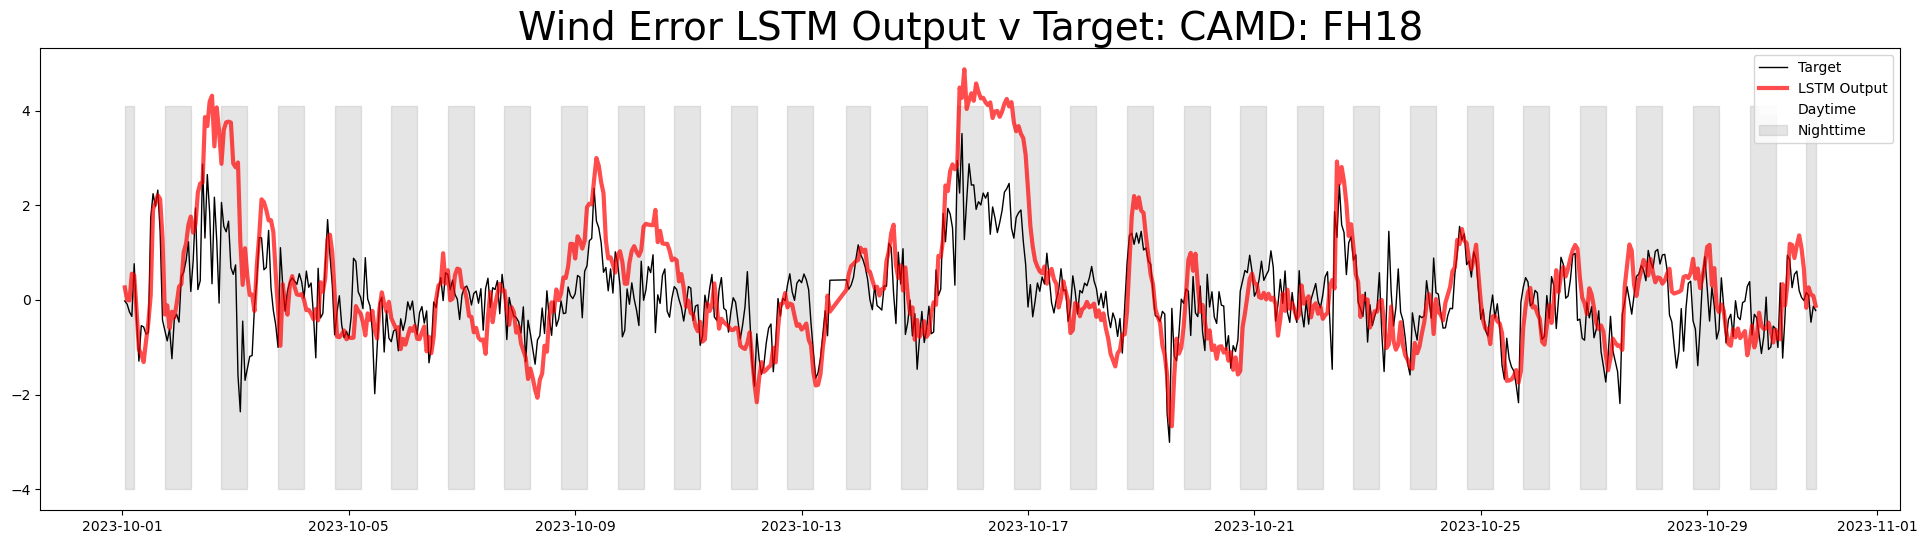

In [210]:
x = ml_output(ldf, full_df, 4, station, test_set_start, test_set_finish, fh)

In [211]:
ldf.head()

,target_error_lead_0,Model forecast,diff,valid_time
43799,-0.021983,0.264794,-0.286777,2023-10-01 01:00:00
43800,-0.089674,-0.001926,-0.087747,2023-10-01 02:00:00
43801,-0.254333,-0.009834,-0.244499,2023-10-01 03:00:00
43802,-0.347149,0.553270,-0.900419,2023-10-01 04:00:00
43803,0.763698,0.518970,0.244728,2023-10-01 05:00:00


In [212]:
for k in full_df.columns:
    if re.search(
        f"{station}|valid|Model forecast|Abs_err",
        k,
    ):
        continue
    else:
        full_df = full_df.drop(columns=[k])

In [213]:
# test_len = int(len(full_df['valid_time'])*0.2)
# full_df = full_df.iloc[0:test_len]

In [214]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month), (df.valid_time.dt.year)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(1, len(the_list) + 1)
    plt.bar(x, the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])
    ax.set_xticks(np.arange(1, len(the_list) + 1, int((len(the_list) + 1) / 6)))
    return the_list

In [215]:
full_df.head()

,valid_time_cos,valid_time_sin,valid_time,t2m_CAMD,sh2_CAMD,d2m_CAMD,r2_CAMD,u10_CAMD,v10_CAMD,tp_CAMD,...,relh_CAMD,srad_CAMD,pres_CAMD,mslp_CAMD,wspd_sonic_mean_CAMD,wspd_sonic_CAMD,wmax_sonic_CAMD,wdir_sonic_CAMD,snow_depth_CAMD,precip_total_CAMD
43799,-0.008583,-0.999963,2023-10-01 01:00:00,15.679590,0.00988,13.856653,82.800003,1.511076,-1.365469,0.0,...,98.947594,0.000792,1005.960999,1006.227905,0.951273,0.766770,1.026596,308.569489,-999.0,0.0
43800,-0.008583,-0.999963,2023-10-01 02:00:00,15.054834,0.00990,13.879602,86.099998,1.881660,-0.929817,0.0,...,98.693069,0.000159,1006.033997,1006.308716,1.228106,1.489371,2.655044,329.356689,-999.0,0.0
43801,-0.008583,-0.999963,2023-10-01 03:00:00,14.362421,0.00907,12.598657,83.000000,1.770615,-1.335009,0.0,...,98.139717,0.000182,1006.190979,1006.501526,0.561229,0.882183,1.925080,334.974701,-999.0,0.0
43802,-0.008583,-0.999963,2023-10-01 04:00:00,13.601709,0.00873,12.001184,80.699997,1.821072,-0.749939,0.0,...,98.949883,0.000203,1006.250000,1006.674316,0.389900,0.275492,0.649950,107.957603,-999.0,0.0
43803,-0.008583,-0.999963,2023-10-01 05:00:00,12.785974,0.00799,10.632867,77.199997,1.266735,1.114035,0.0,...,99.708321,0.000419,1006.306030,1006.794800,0.206702,0.000000,0.000000,0.000000,-999.0,0.0


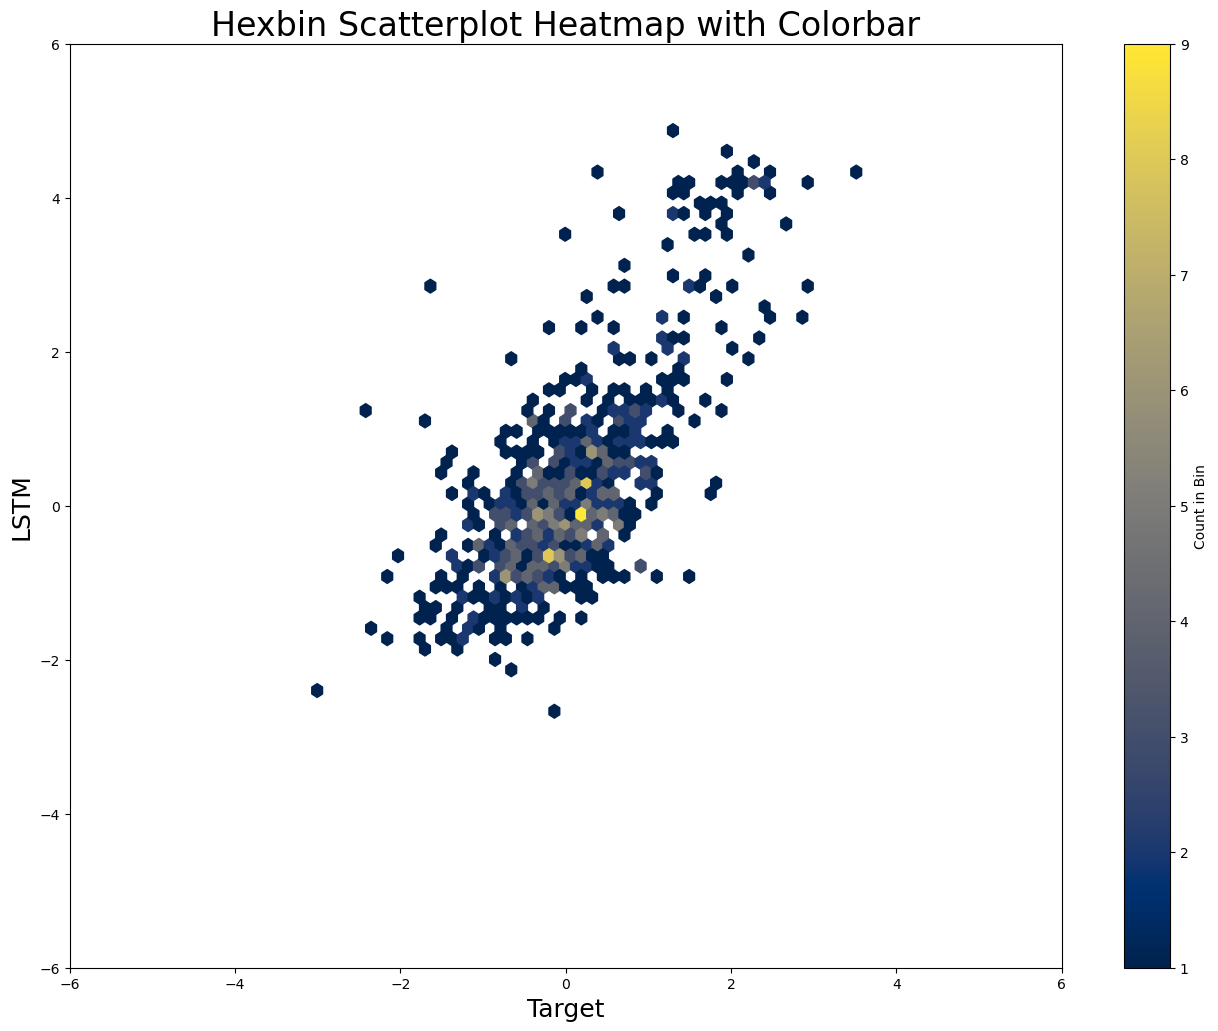

In [216]:
create_hexbin_heatmap(ldf)

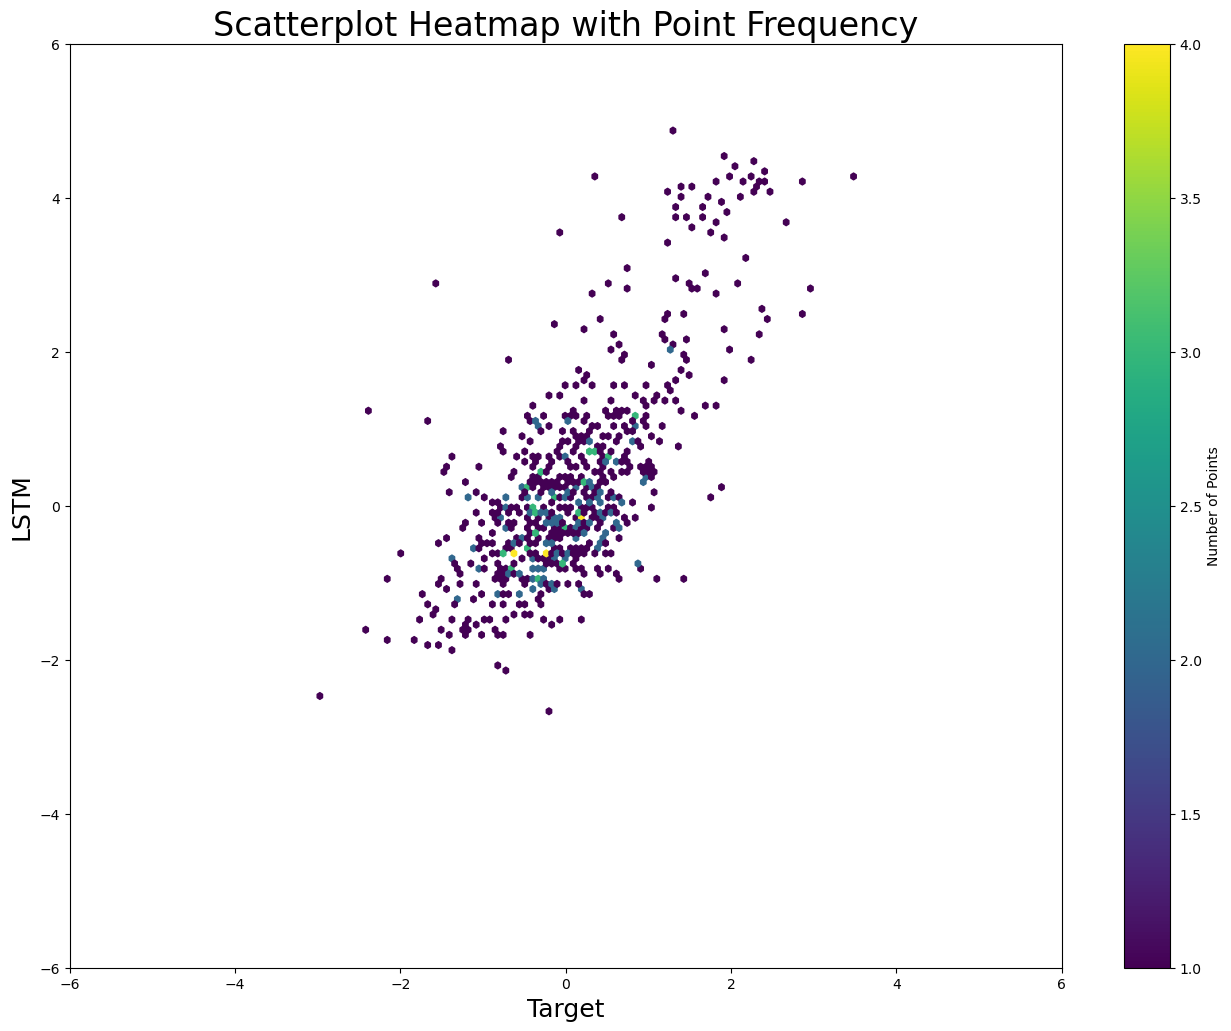

In [217]:
create_scatterplot_heatmap(ldf)

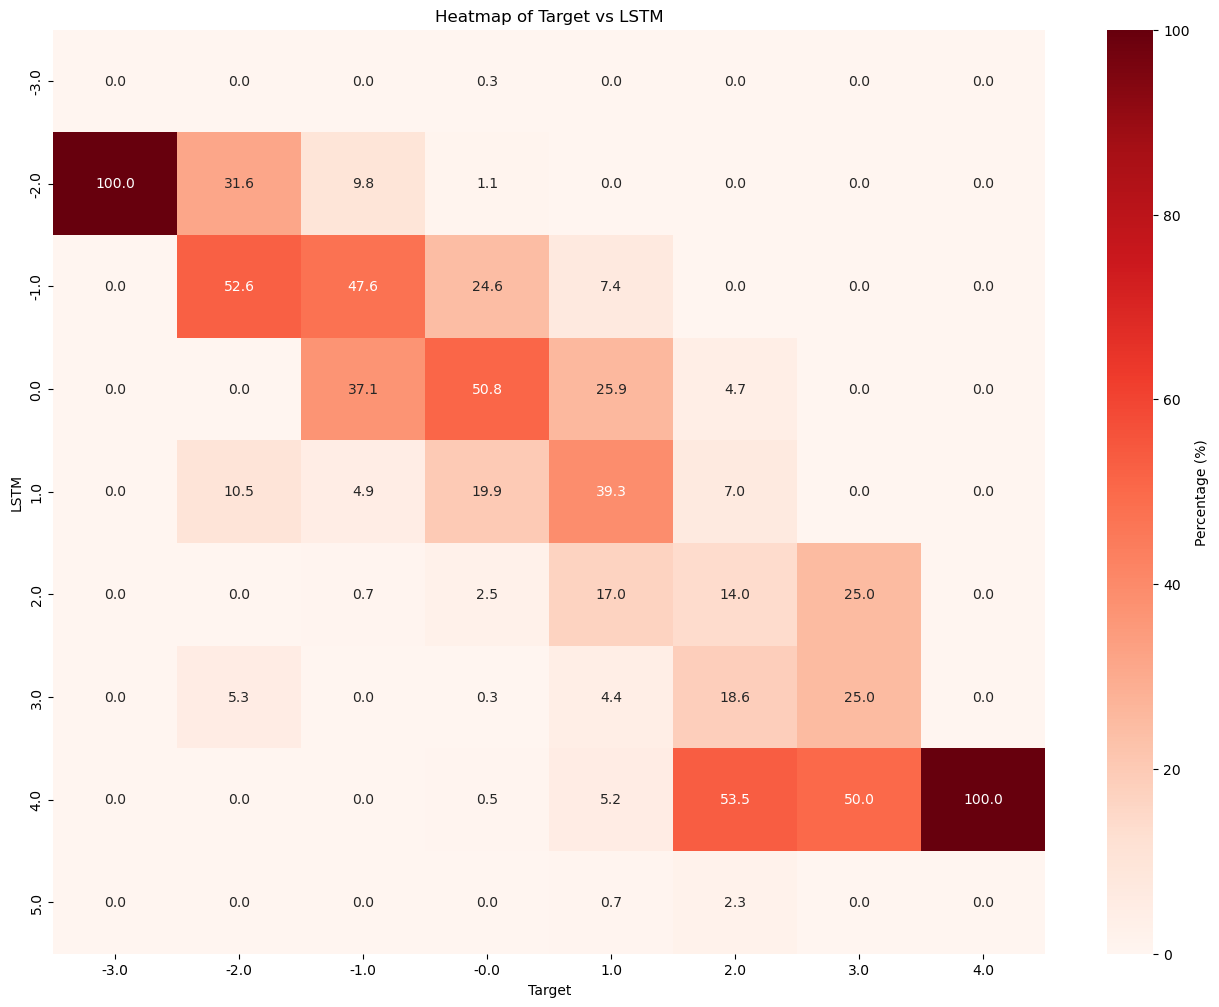

In [218]:
create_heatmap(ldf)

/tmp/tmp.LJwjXclAxn/ipykernel_2067758/1383083808.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])


ZeroDivisionError: division by zero

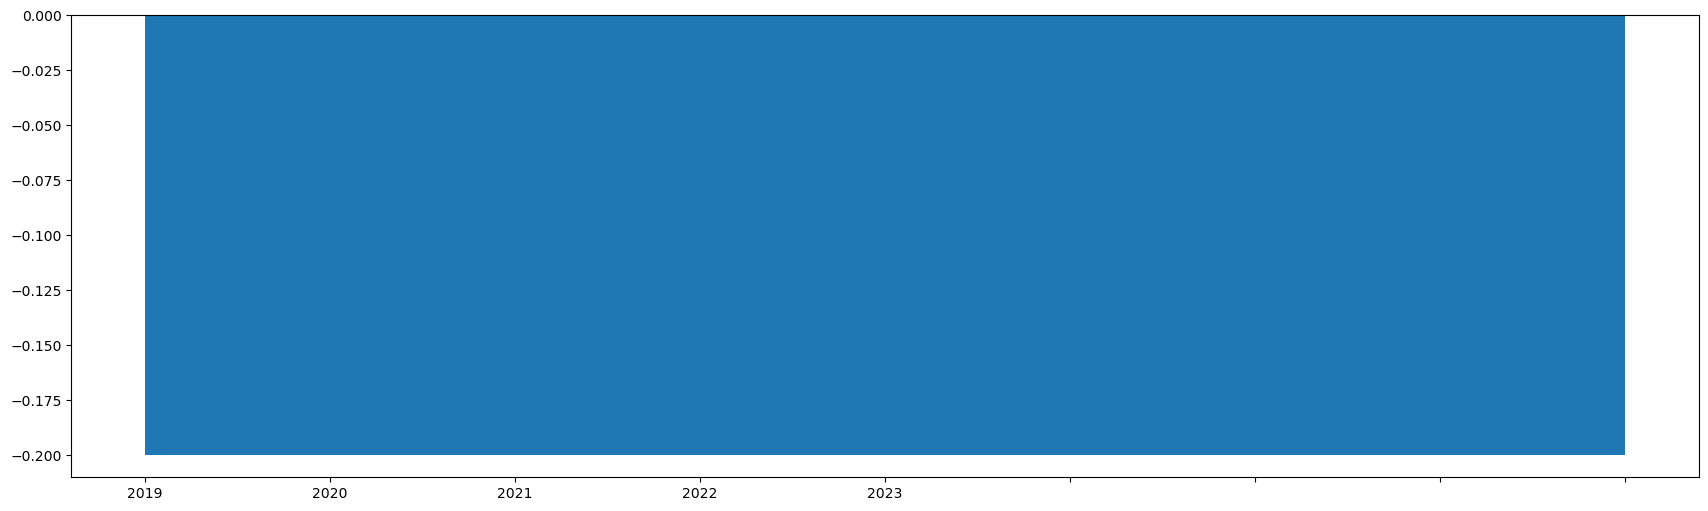

In [219]:
err_by_month = groupby_month(ldf, "diff")

In [ ]:
def groupby_time(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.hour)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))
    plt.bar(x, the_list, color="g")
    return the_list

In [ ]:
err_by_time = groupby_time(ldf, "diff")

In [ ]:
import calendar


def groupby_month_total(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))

    # Get a colormap
    cmap = plt.get_cmap("RdBu")
    # Normalize your data to map to the colormap
    norm = plt.Normalize(min(the_list), max(the_list))
    colors = cmap(norm(the_list))

    # Create a bar chart
    plt.bar(x, the_list, color=colors)
    ax.set_xticks(x)  # Set x-ticks to be at the positions of the months
    month_labels = [calendar.month_name[month] for month in GB.index]
    ax.set_xticklabels(month_labels)  # Label x-ticks with month numbers

    plt.show()
    return the_list

In [ ]:
groupby_month_total(ldf, "diff")

In [ ]:
def myround(x, base):
    return base * round(x / base)

In [ ]:
# function to get unique values
def unique(list1):
    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [ ]:
def err_bucket(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))

    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        err = full_df["Abs_err"].iloc[i]
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]

    return temp_df, instances

In [ ]:
def plot_buckets(temp_df, instances, var_name, cmap, width):
    my_cmap = plt.get_cmap(cmap)
    averages = temp_df / instances
    y = averages
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    the_list = averages.tolist()
    fig, ax = plt.subplots(
        figsize=(21, 6), facecolor="slategrey", constrained_layout=True
    )
    bars = plt.bar(temp_df.keys(), the_list, color=my_cmap(rescale(y)), width=width)
    ax.set_title("Absolute Error of LSTM", fontsize=28, c="white")
    ax.set_xlabel(var_name, fontsize=18, c="white")
    ax.set_ylabel("Mean Absolute Error", fontsize=18, c="white")
    # Iterating over the bars one-by-one
    # Annotate each bar with its value
    # Annotate each bar with the number of instances
    for bar, value, instance_count in zip(bars, the_list, instances):
        yval = value + 0.01  # Adjust the vertical position of the label
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"n={instance_count}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=12,
            rotation=90,
        )

In [ ]:
# for k in full_df.keys():
#     print(k)

In [ ]:
# diector = sorted(os.listdir('/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/'))

# for d in diector:
#         full_df = pd.read_parquet(
#         f"/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/{d}"
#     )
#         for k in full_df.columns:
#             if re.search(
#                 f"{station}",
#                 k,
#             ):
#                 print("Succes!!")
#                 print(d)
#             else:
#                 continue

In [ ]:
# Reset index for both DataFrames to ensure alignment
full_df = full_df.reset_index(drop=True)
ldf = ldf.reset_index(drop=True)
full_df["Abs_err"] = ldf["diff"]

In [ ]:
full_df.dropna(inplace=True)

In [ ]:
temp_df, instances = err_bucket(full_df, f"tair_{station}", 2)

In [ ]:
plot_buckets(temp_df, instances, "Temperature (C)", "Wistia", 2.5)

In [ ]:
relh_df, instances = err_bucket(full_df, f"relh_{station}", 2)

In [ ]:
plot_buckets(relh_df, instances, "Relative Humidity (%)", "copper", 5.0)

In [ ]:
new_df, instances = err_bucket(full_df, f"srad_{station}", 40)

In [ ]:
plot_buckets(new_df, instances, "Solar Radiation (W / m*m)", "copper", 50.0)
full_df

In [ ]:
pres_df, instances = err_bucket(full_df, f"pres_{station}", 2)

In [ ]:
print(f'The mean pressure at {station} is {full_df[f"pres_{station}"].mean()}')

In [ ]:
plot_buckets(pres_df, instances, "Surface Pressure (mb)", "copper", 1.5)

In [ ]:
def round_small(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
            temps.append(rounded)
        else:
            rounded = myround(full_df[met_col].iloc[i], 1)
            temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))
    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
        else:
            rounded = float(myround(full_df[met_col].iloc[i], base=1))
        err = float(full_df["Abs_err"].iloc[i])
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]
    temp_df = temp_df.loc[~(temp_df == 0)]
    instances = instances.loc[~(instances == 0)]
    return temp_df, instances

In [ ]:
rain_df, instances = err_bucket(full_df, f"precip_total_{station}", 2)

In [ ]:
plot_buckets(rain_df, instances, "Precipitation [mm/hr]", "winter", 1.0)

In [ ]:
snow_df, instances = round_small(full_df, f"snow_depth_{station}", 2)

In [ ]:
snow_df = snow_df.iloc[1:]
instances = instances.iloc[1:]

In [ ]:
plot_buckets(snow_df, instances, "Accumulated Snow (m)", "cool", 0.01)

In [ ]:
wmax, instances = err_bucket(full_df, f"wmax_sonic_{station}", 2)

In [ ]:
plot_buckets(wmax, instances, "Wind Max (m/s)", "copper", 1.0)
print("Hello camera man")

In [ ]:
wdir, instances = err_bucket(full_df, f"wdir_sonic_{station}", 45)

In [ ]:
plot_buckets(wdir, instances, "Wind Dir (degrees)", "copper", 10.0)